In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import io
import geodatasets
from sklearn.model_selection import train_test_split

C:\Users\cathy\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\cathy\OneDrive\Documents\STAT-390-Project\MCMF")

In [3]:
data = pd.read_csv('data_cleaned.csv')
data.head()

C:\Users\cathy\AppData\Local\Temp\ipykernel_16796\1908207649.py:1: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_cleaned.csv')


,Unnamed: 0,index_row,id,program_name,description,org_name,category_name,capacity,min_age,max_age,...,wed_end_time,wed_start_time,program_price,geographic_cluster_name,program_pays_participants,program_has_scholarships,program_provides_transportation,latitude,longitude,program_provides_free_food
0,0,"4,568",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,academic_support,2000.0,7,15,...,NaN,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,1,"4,569",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,work_career,2000.0,7,15,...,NaN,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,2,"4,562",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,academic_support,100.0,12,18,...,NaN,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,3,"4,563",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,music_art,100.0,12,18,...,NaN,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,4,"4,557",78746,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,managing_money,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [110]:
data.columns

Index(['Unnamed: 0', 'index_row', 'id', 'program_name', 'description',
       'org_name', 'category_name', 'capacity', 'min_age', 'max_age',
       'meeting_type', 'address', 'city', 'state', 'zipcode', 'online_address',
       'program_url', 'registration_url', 'registration_open',
       'registration_deadline', 'start_date', 'end_date', 'start_time',
       'end_time', 'scheduled_mon', 'scheduled_tues', 'scheduled_fri',
       'scheduled_sat', 'scheduled_sun', 'scheduled_thurs', 'scheduled_wed',
       'fri_end_time', 'fri_start_time', 'mon_end_time', 'mon_start_time',
       'sat_end_time', 'sat_start_time', 'sun_end_time', 'sun_start_time',
       'thurs_end_time', 'thurs_start_time', 'tues_end_time',
       'tues_start_time', 'wed_end_time', 'wed_start_time', 'program_price',
       'geographic_cluster_name', 'program_pays_participants',
       'program_has_scholarships', 'program_provides_transportation',
       'latitude', 'longitude', 'program_provides_free_food', 'year', 'mon

In [5]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [111]:
train_data

,Unnamed: 0,index_row,id,program_name,description,org_name,category_name,capacity,min_age,max_age,...,wed_end_time,wed_start_time,program_price,geographic_cluster_name,program_pays_participants,program_has_scholarships,program_provides_transportation,latitude,longitude,program_provides_free_food
34002,43877,"43,052",115186,Drop-In at Gompers,This activity provides structured activities f...,Chicago Park District,academic_support,15.0,6,13,...,NaN,NaN,More Than $50,NORTH PARK,Not Paid,NO,NO,41.975800,-87.734398,False
65762,77746,"77,777",149669,Intro to Volleyball (ASMG) at Gately,This activity provides Volleyball instruction ...,Chicago Park District,sports_wellness,12.0,9,18,...,NaN,NaN,$50 or Less,PULLMAN,Not Paid,NO,NO,41.708530,-87.603142,False
62342,74061,"74,230",145028,DIY Mini Looms: Weaving Coasters,Learn to make a simple handmade loom from recy...,Chicago Public Library,music_art,99.0,18,99,...,NaN,NaN,Free,CHATHAM,Not Paid,NO,NO,41.750935,-87.614243,False
24334,32305,"27,527",100312,"Fashion Photography, Chicago Style","<p><span class=""TextRun BCX0 SCXW33572190""><s...",Chicago Center for Arts & Technology,computers,16.0,13,18,...,17:00:00,16:27:00,Free,NEAR WEST SIDE,Not Paid,NO,NO,41.864799,-87.669098,False
43181,53813,"54,405",126167,Get to Work with the ICNC,"Create a new resume, update an outdated resume...",Chicago Public Library,work_career,18.0,18,99,...,NaN,NaN,Free,GARFIELD PARK,Not Paid,NO,NO,41.879299,-87.725304,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,47192,"48,103",120021,Walk/Run (ASMG) - Open at Gately,Track and field facility is available for walk...,Chicago Park District,sports_wellness,35.0,16,99,...,NaN,NaN,Free,PULLMAN,Not Paid,NO,NO,41.708500,-87.603104,False
6265,8008,"9,012",82887,Park Kids at Fosco,Get up and moving in a Park Kids Program in th...,Chicago Park District,sports_wellness,9.0,6,9,...,NaN,NaN,$50 or Less,NEAR WEST SIDE,Not Paid,NO,NO,41.864700,-87.657501,False
54886,66201,"66,415",137591,"Spikes, Studs and More","Ready, set, transform! In this workshop, artis...",Chicago Public Library,music_art,NaN,13,18,...,NaN,NaN,Free,ARMOUR SQUARE,Not Paid,NO,NO,41.854099,-87.632004,False
860,1057,"1,188",77693,Day Camp (ages 6-7) at Sheil,"Price:$217.00 (Resident)Starting with Summer, ...",Chicago Park District,music_art,NaN,6,99,...,NaN,NaN,More Than $50,LAKE VIEW,Not Paid,NO,NO,41.945400,-87.663902,False


In [92]:
def count_programs_by_features(data, features):
    # Extract the month and year from the start_date column
    data['start_date'] = pd.to_datetime(data['start_date'])
    data['month'] = data['start_date'].dt.month
    data['year'] = data['start_date'].dt.year
    
    features_with_month = features + ['month', 'year']
    
    program_counts = data.groupby(features_with_month).size().reset_index(name='count')
    
    return program_counts

In [98]:
features = ['category_name','geographic_cluster_name']
program_counts = count_programs_by_features(data, features)
print(program_counts)

          category_name  capacity geographic_cluster_name  month  year  count
0      academic_support       0.0                 ASHBURN      9  2020      1
1      academic_support       0.0          AUBURN GRESHAM      4  2023      1
2      academic_support       0.0                  AUSTIN      1  2021      1
3      academic_support       0.0                  AUSTIN      9  2020      2
4      academic_support       0.0             AVALON PARK      4  2023      9
...                 ...       ...                     ...    ...   ...    ...
18336       work_career     100.0            WEST PULLMAN      4  2021      1
18337       work_career     150.0            WEST PULLMAN      5  2021      1
18338       work_career    1813.0          WEST ENGLEWOOD      3  2023      2
18339       work_career    2000.0          NEAR WEST SIDE      1  2020      1
18340       work_career    2000.0          NEAR WEST SIDE      5  2022      1

[18341 rows x 6 columns]


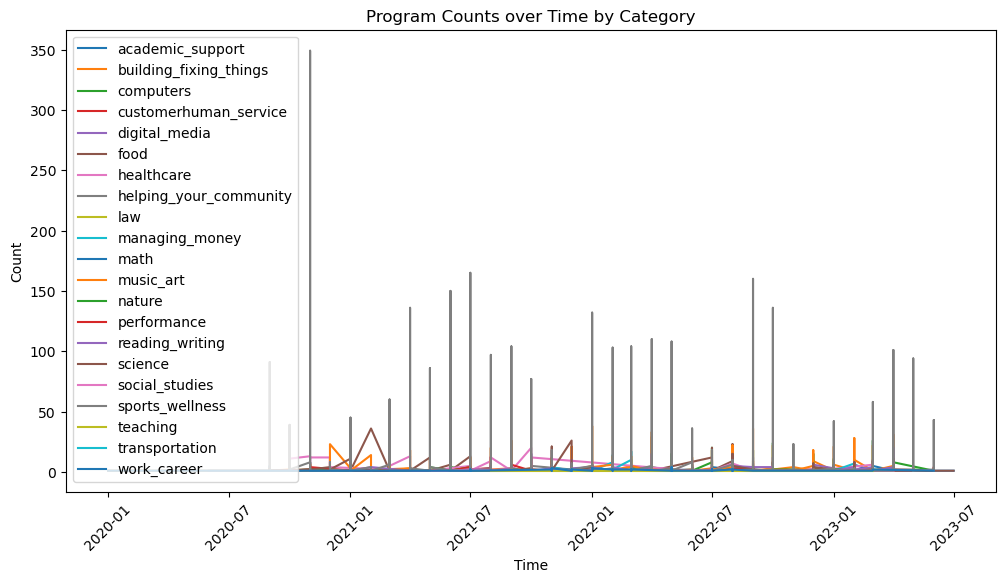

In [101]:
grouped_data = program_counts.groupby('category_name')

plt.figure(figsize=(12, 6))

for category, group in grouped_data:
    group = group.sort_values(['year', 'month'])  # Sort by year and month
    
    # Generate the x-axis values using year and month
    x_values = pd.to_datetime(group['year'].astype(str) + '-' + group['month'].astype(str), format='%Y-%m')
    
    plt.plot(x_values, group['count'], label=category)

plt.xlabel('Time')
plt.ylabel('Count')

plt.title('Program Counts over Time by Category')

plt.xticks(rotation=45)
plt.legend()
plt.show()



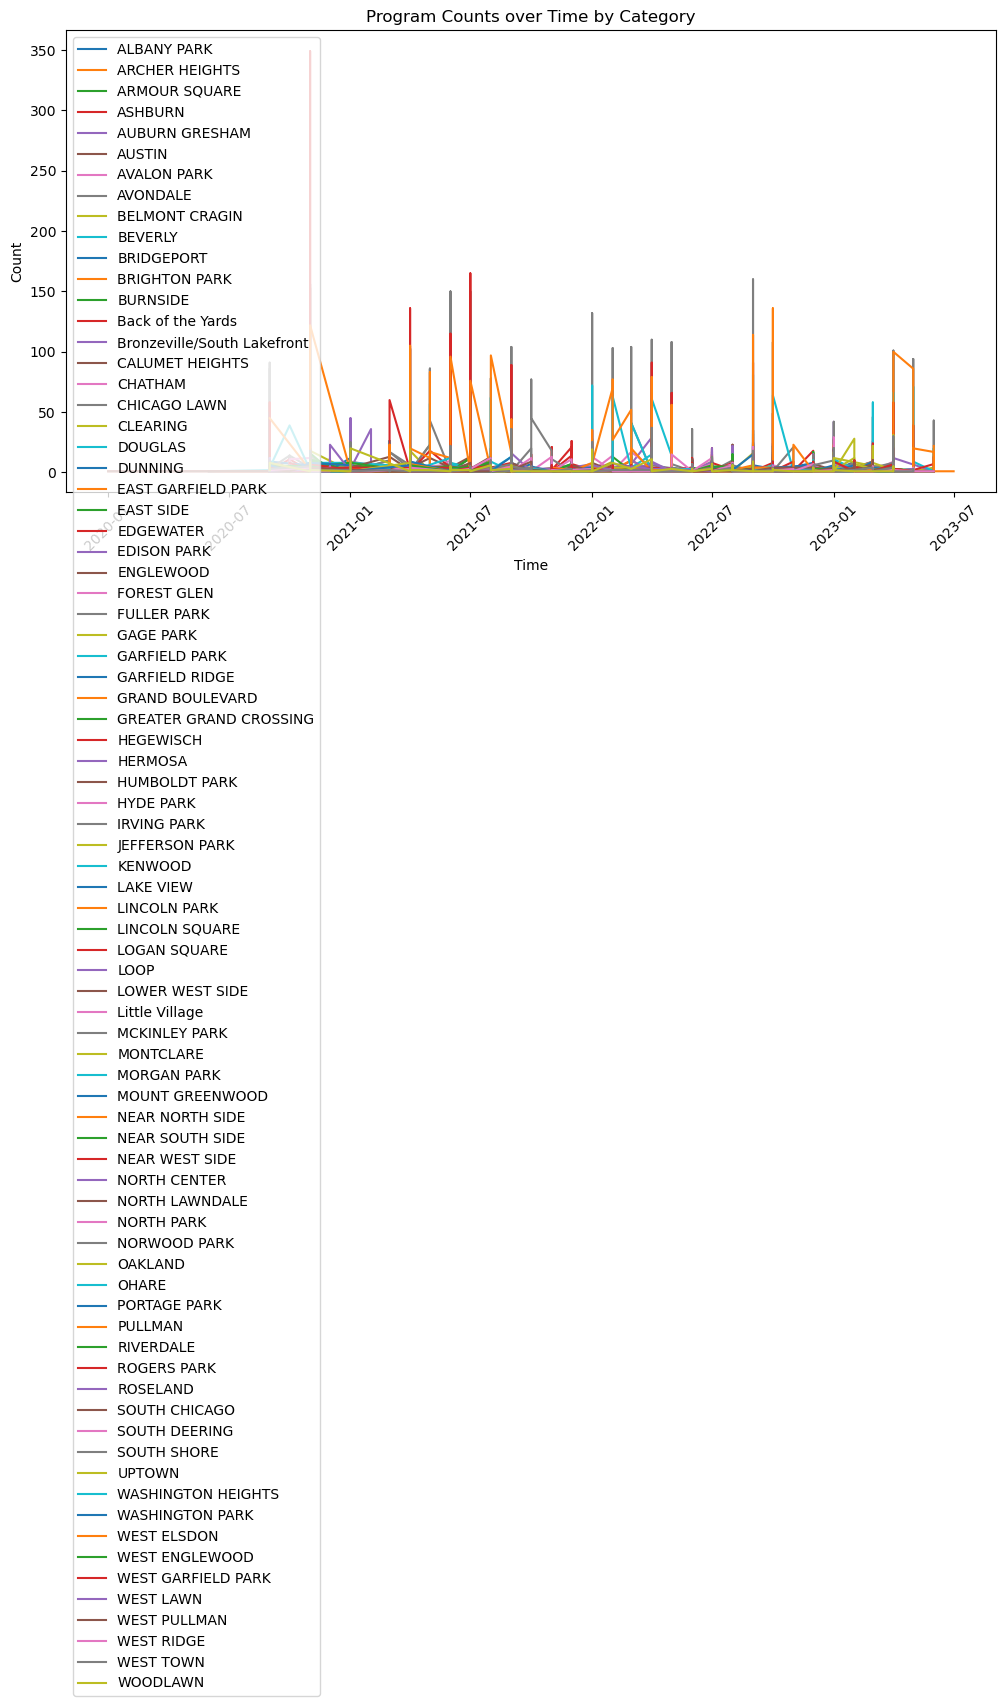

In [104]:
grouped_data = program_counts.groupby('geographic_cluster_name')

plt.figure(figsize=(12, 6))

for category, group in grouped_data:
    group = group.sort_values(['year', 'month'])  # Sort by year and month
    
    # Generate the x-axis values using year and month
    x_values = pd.to_datetime(group['year'].astype(str) + '-' + group['month'].astype(str), format='%Y-%m')
    
    plt.plot(x_values, group['count'], label=category)

plt.xlabel('Time')
plt.ylabel('Count')

plt.title('Program Counts over Time by Category')

plt.xticks(rotation=45)
plt.legend()
plt.show()

### Training

In [114]:
features = ['category_name']
program_counts = count_programs_by_features(train_data, features)
print(program_counts)

        category_name  month  year  count
0    academic_support      1  2020      2
1    academic_support      1  2021     23
2    academic_support      1  2022    143
3    academic_support      1  2023    373
4    academic_support      2  2021      1
..                ...    ...   ...    ...
469       work_career     10  2022     12
470       work_career     11  2021      9
471       work_career     11  2022      8
472       work_career     12  2021      5
473       work_career     12  2022      1

[474 rows x 4 columns]


In [118]:
program_counts_df = pd.DataFrame(program_counts)
program_counts_df

,category_name,month,year,count
0,academic_support,1,2020,2
1,academic_support,1,2021,23
2,academic_support,1,2022,143
3,academic_support,1,2023,373
4,academic_support,2,2021,1
...,...,...,...,...
469,work_career,10,2022,12
470,work_career,11,2021,9
471,work_career,11,2022,8
472,work_career,12,2021,5


In [120]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Convert 'month' and 'year' columns to datetime
program_counts_df['date'] = pd.to_datetime(program_counts_df[['year', 'month']].assign(day=1))

# Set the 'date' column as the index
program_counts_df.set_index('date', inplace=True)

# Sort the dataframe based on the index
program_counts_df.sort_index(inplace=True)

# Prepare the training data
train_data = program_counts_df['count']

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()

# Forecast the future values
future_periods = 12  # Number of periods to forecast
forecast = model_fit.forecast(steps=future_periods)

# Print the forecasted values
print(forecast)


474    1.0
475    1.0
476    1.0
477    1.0
478    1.0
479    1.0
480    1.0
481    1.0
482    1.0
483    1.0
484    1.0
485    1.0
Name: predicted_mean, dtype: float64


C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [134]:
features = ['category_name']
program_counts_test = count_programs_by_features(test_data, features)
print(program_counts_test)

        category_name  month  year  count
0    academic_support      1  2021      7
1    academic_support      1  2022     34
2    academic_support      1  2023     84
3    academic_support      2  2022      2
4    academic_support      2  2023     10
..                ...    ...   ...    ...
366       work_career     10  2022      4
367       work_career     11  2021      4
368       work_career     11  2022      1
369       work_career     12  2021      2
370       work_career     12  2022      2

[371 rows x 4 columns]


In [138]:
program_counts_test['date'] = pd.to_datetime(program_counts_test[['year', 'month']].assign(day=1))
program_counts_test.set_index('date', inplace=True)
program_counts_test.head()

,category_name,month,year,count
date,,,,
2021-01-01,academic_support,1,2021,7
2022-01-01,academic_support,1,2022,34
2023-01-01,academic_support,1,2023,84
2022-02-01,academic_support,2,2022,2
2023-02-01,academic_support,2,2023,10


In [139]:
test_y = program_counts_test['count']
test_x = program_counts_test[['category_name','month','year']]

In [140]:
test_x

,category_name,month,year
date,,,
2021-01-01,academic_support,1,2021
2022-01-01,academic_support,1,2022
2023-01-01,academic_support,1,2023
2022-02-01,academic_support,2,2022
2023-02-01,academic_support,2,2023
...,...,...,...
2022-10-01,work_career,10,2022
2021-11-01,work_career,11,2021
2022-11-01,work_career,11,2022


In [141]:
test_x['date'] = pd.to_datetime(test_x[['year', 'month']].assign(day=1))
test_x.set_index('date', inplace=True)


In [142]:
forecast = model_fit.forecast(steps=len(test_x))


C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [143]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_y, forecast)
print("MAE:", mae)

MAE: 38.23719676549865
